<h1><b><u>Natural Language Processing 1</u></b></h1>

In [3]:
#libraries to use for this codebase
import tensorflow as tf
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### `pretrained model from tensorflow`

In [7]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
# Function to plot sample images from the dataset
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

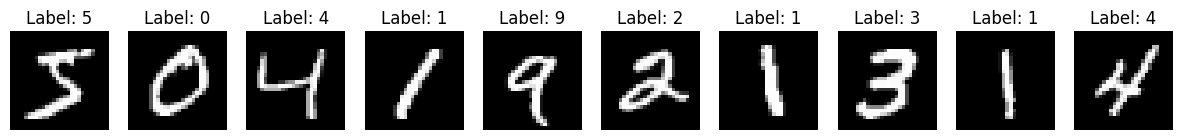

In [9]:
# Plotting sample images from the training set
plot_sample_images(x_train, y_train)


In [10]:
# Function to plot label distribution
def plot_label_distribution(labels):
    plt.figure(figsize=(10, 6))
    sns.countplot(labels)
    plt.title('Label Distribution in Training Set')
    plt.xlabel('Digit Label')
    plt.ylabel('Count')
    plt.show()

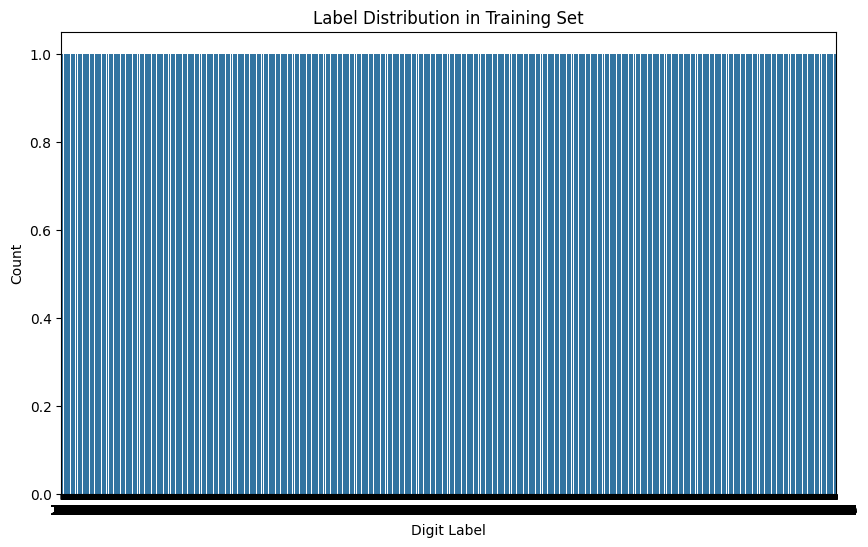

In [11]:
# Plotting label distribution in the training set
plot_label_distribution(y_train)

In [12]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),     # Flatten the input
    tf.keras.layers.Dense(128, activation='relu'),    # First dense layer with ReLU activation
    tf.keras.layers.Dropout(0.2),                     # Dropout layer for regularization
    tf.keras.layers.Dense(10, activation='softmax')   # Output layer with softmax activation
])


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# Train the model and capture the training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3005 - accuracy: 0.9127 - val_loss: 0.1410 - val_accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1433 - accuracy: 0.9569 - val_loss: 0.0973 - val_accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9671 - val_loss: 0.0836 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0874 - accuracy: 0.9732 - val_loss: 0.0767 - val_accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0735 - accuracy: 0.9768 - val_loss: 0.0706 - val_accuracy: 0.9780


`The model is 97.68% accurate`

In [15]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()


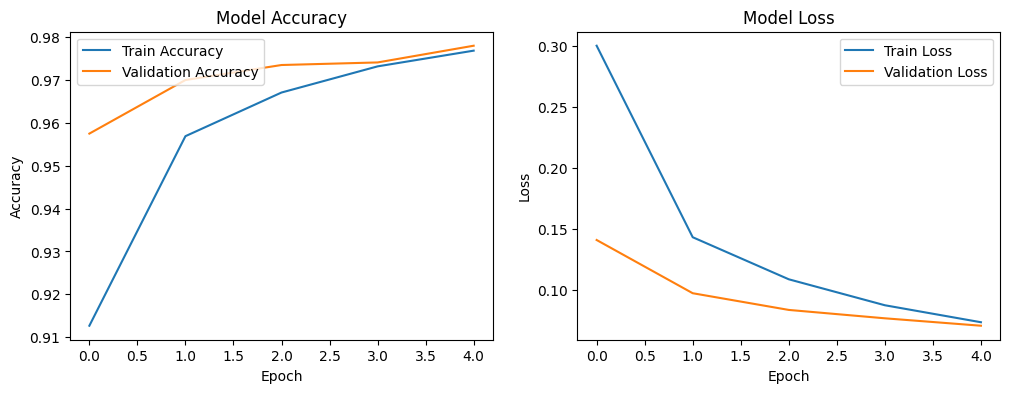

In [16]:
# Plotting the training history
plot_training_history(history)


In [17]:

# Evaluate the model
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9780


[0.07060486078262329, 0.9779999852180481]